P4. Illustrate "Fourier Transform" decompose an image into its sine and cosine components and apply the following filters in frequency domain <bt>
4.1. Ideal Low Pass Filter<br>
4.2. Ideal High Pass Filter<br>
<br>
The task for today’s session is to enhance the quality of a satellite image(sample image link). The image contains both high-frequency details and low-frequency components. To analyze and improve the image quality, follow these steps:<br>

1. Decompose the image using the Fourier Transform: Transform the image from the spatial domain to the frequency domain.<br>
2. Apply the following filtering techniques:<br>
a. Ideal Low Pass Filter<br>
b. Ideal High Pass Filter<br>
c. Butterworth Low Pass Filter<br>
d. Butterworth High Pass Filter<br>
e. Gaussian Low Pass Filter<br>
f. Gaussian High Pass Filter<br>

3. Analyze with visualization proof, the impact of filter radius: Vary the cutoff radius for each filter type and observe changes in image quality and frequency representation.

<b>Step 1. Load and Pre-process the image<b>

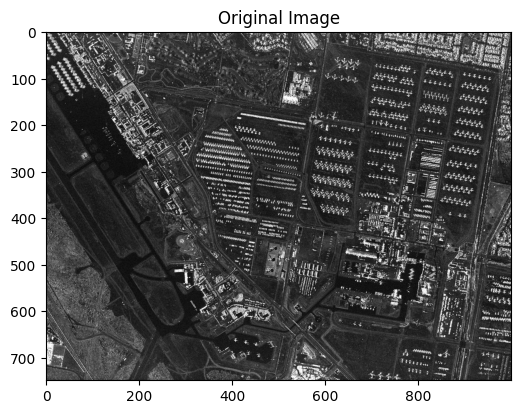

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (grayscale for simplicity)
image = cv2.imread('image.jpg', 0)

# Display the original image
plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.show()

<b>Step 2: Perform Fourier Transform<b>

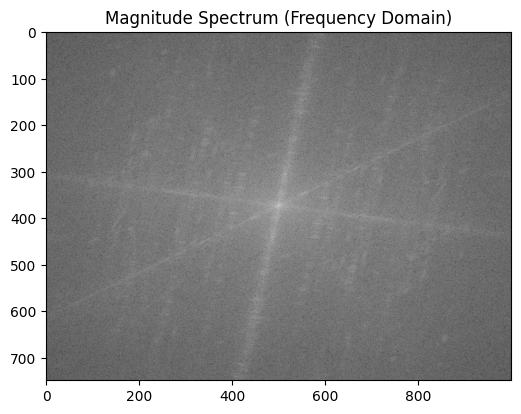

In [12]:
# Perform Fourier Transform
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)  # Shift the zero frequency to the center

# Magnitude Spectrum for visualization
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

plt.figure(figsize=(6,6))
plt.title("Magnitude Spectrum (Frequency Domain)")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

The 2D Fourier Transform (fft2) converts the image from the spatial domain (pixel values) to the frequency domain.<br>
The fftshift function moves the zero-frequency component (low frequencies) to the center of the image for easier visualization and filtering.<br>
<br>
Interpretation:<br>
The Fourier Transform allows us to see which frequencies are prominent in the image. Low frequencies are typically associated with smooth areas (background), while high frequencies capture details like edges and texture.

<b>Step 3: Defining the Filters<b>

1. IDEAL FILTER

In [13]:
# Filter application functions
def ideal_filter(shape, radius, filter_type='low'):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
            if filter_type == 'low':
                mask[i, j] = 1 if distance <= radius else 0
            else:
                mask[i, j] = 0 if distance <= radius else 1
    return mask

The Ideal Low Pass Filter allows only frequencies below a certain cutoff radius to pass through and blocks higher frequencies.<br>
The Ideal High Pass Filter does the opposite, allowing only high frequencies to pass.

2. BUTTERWORTH FILTER

In [ ]:
def butterworth_filter(shape, radius, n, filter_type='low'):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
            if filter_type == 'low':
                mask[i, j] = 1 / (1 + (distance / radius)**(2*n))
            else:
                mask[i, j] = 1 - 1 / (1 + (distance / radius)**(2*n))
    return mask

The Butterworth Filter applies a smoother transition between passing and blocking frequencies, controlled by the order n. Higher orders make the filter closer to the ideal filter.

3. GAUSSIAN FILTER

In [ ]:
def gaussian_filter(shape, radius, filter_type='low'):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
            if filter_type == 'low':
                mask[i, j] = np.exp(-(distance**2) / (2 * (radius**2)))
            else:
                mask[i, j] = 1 - np.exp(-(distance**2) / (2 * (radius**2)))
    return mask

The Gaussian Filter applies a gradual and smooth transition for passing frequencies, based on a Gaussian function. It's useful for both low and high-pass filtering.

<b>Step 4: Apply and inverse Fourier Transform<b>

In [14]:
# Function to apply filter, inverse transform, and return image
def apply_filter(dft_shift, filter_mask):
    filtered_dft = dft_shift * filter_mask
    inverse_shift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(inverse_shift)
    return np.abs(filtered_image)

Explanation:<br>
After filtering in the frequency domain, we multiply the Fourier-transformed image (dft_shift) with the filter mask.<br>
We then apply the Inverse Fourier Transform to convert the filtered frequency domain image back into the spatial domain (an image we can visualize).<br>
<br>
Interpretation:<br>
This step allows us to observe how the filtered frequencies affect the final image. Low-pass filters will retain smooth areas, while high-pass filters will enhance the edges and details by removing low-frequency information.

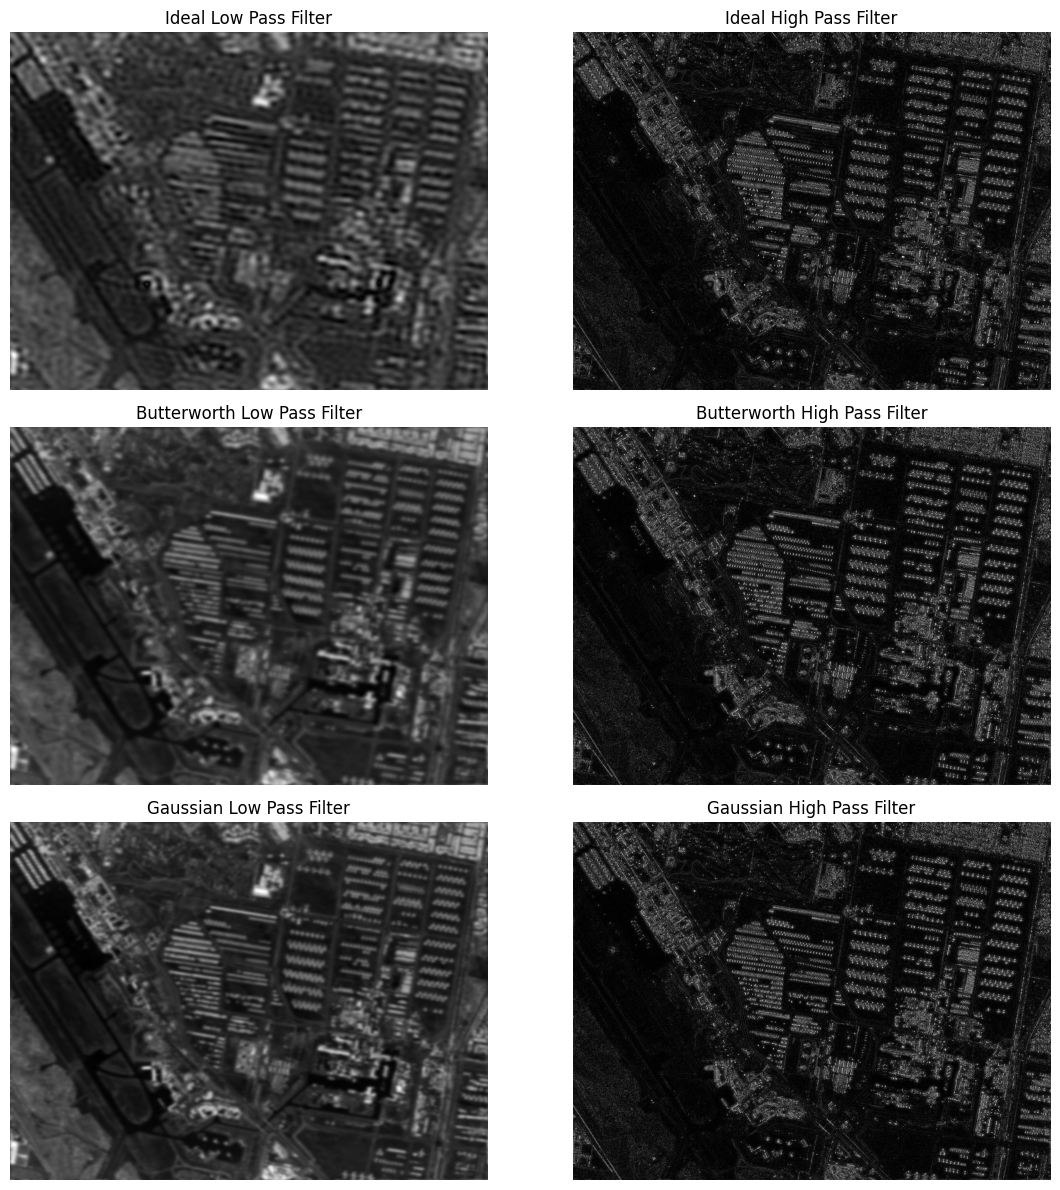

In [15]:
# Cutoff radius for all filters
radius = 50
butterworth_order = 2

# Apply all filters
ideal_lpf_mask = ideal_filter(image.shape, radius, 'low')
ideal_hpf_mask = ideal_filter(image.shape, radius, 'high')

butter_lpf_mask = butterworth_filter(image.shape, radius, butterworth_order, 'low')
butter_hpf_mask = butterworth_filter(image.shape, radius, butterworth_order, 'high')

gaussian_lpf_mask = gaussian_filter(image.shape, radius, 'low')
gaussian_hpf_mask = gaussian_filter(image.shape, radius, 'high')

# Generate filtered images
ideal_lpf_image = apply_filter(dft_shift, ideal_lpf_mask)
ideal_hpf_image = apply_filter(dft_shift, ideal_hpf_mask)

butter_lpf_image = apply_filter(dft_shift, butter_lpf_mask)
butter_hpf_image = apply_filter(dft_shift, butter_hpf_mask)

gaussian_lpf_image = apply_filter(dft_shift, gaussian_lpf_mask)
gaussian_hpf_image = apply_filter(dft_shift, gaussian_hpf_mask)

# Plot all images in a grid
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Titles
titles = ['Ideal Low Pass Filter', 'Ideal High Pass Filter', 
          'Butterworth Low Pass Filter', 'Butterworth High Pass Filter', 
          'Gaussian Low Pass Filter', 'Gaussian High Pass Filter']

# Filtered images
images = [ideal_lpf_image, ideal_hpf_image, 
          butter_lpf_image, butter_hpf_image, 
          gaussian_lpf_image, gaussian_hpf_image]

# Plot each image
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

Interpretation:<br>

Each filter type has its own method for separating low and high-frequency components. <br>
Ideal filters provide sharp transitions, while Butterworth and Gaussian filters introduce smoother transitions, which can result in more natural filtering.

<b>Step 5: Compare different Radii for each filter<b>

Explanation:<br>
We apply each filter at three different radii (30, 50, 80) to see how varying the cutoff radius affects the filtered image.<br>
For each filter type (Ideal, Butterworth, Gaussian), we generate visual comparisons for both low pass and high pass filtering.

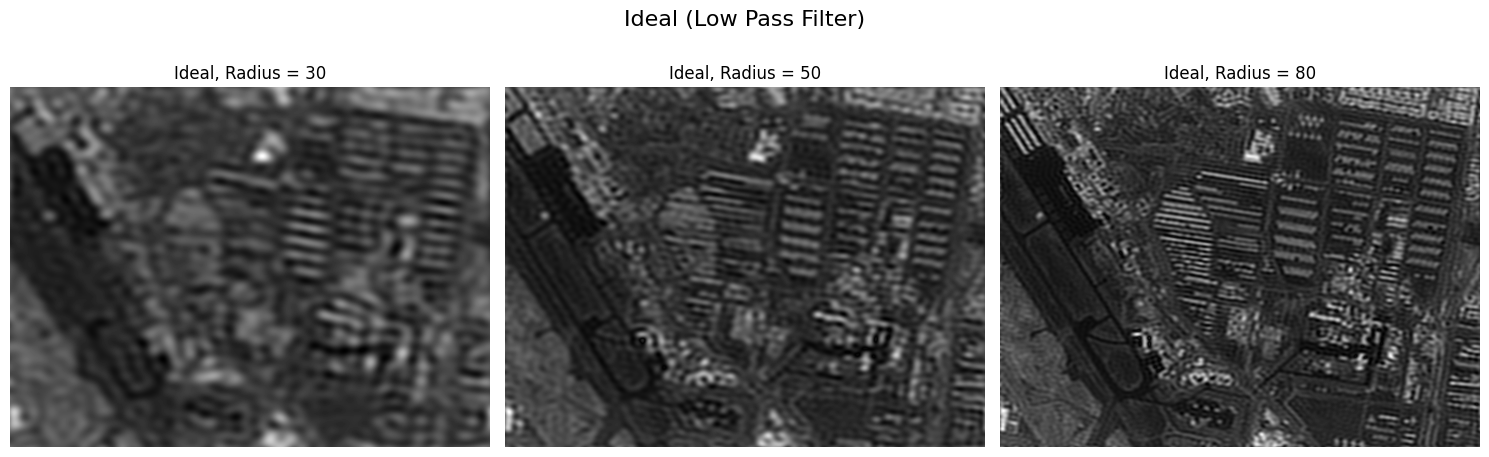

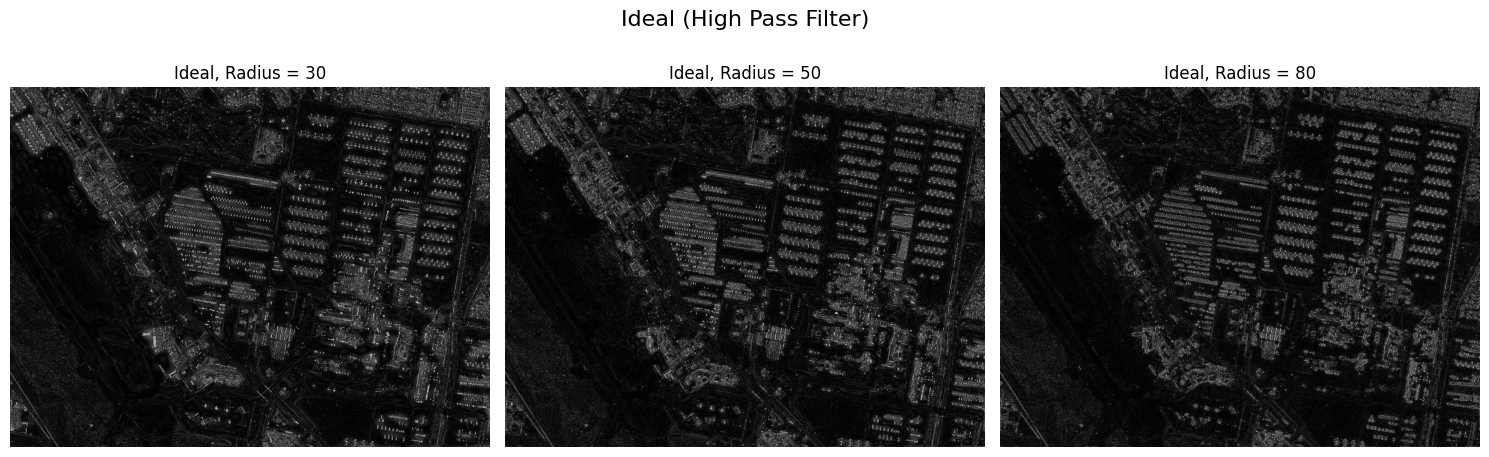

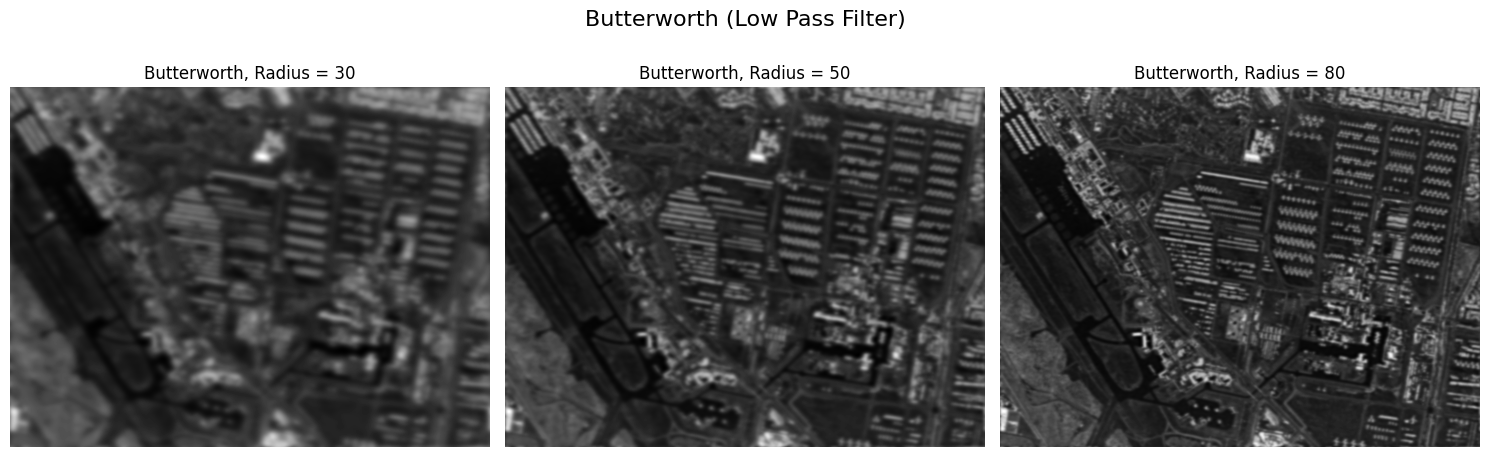

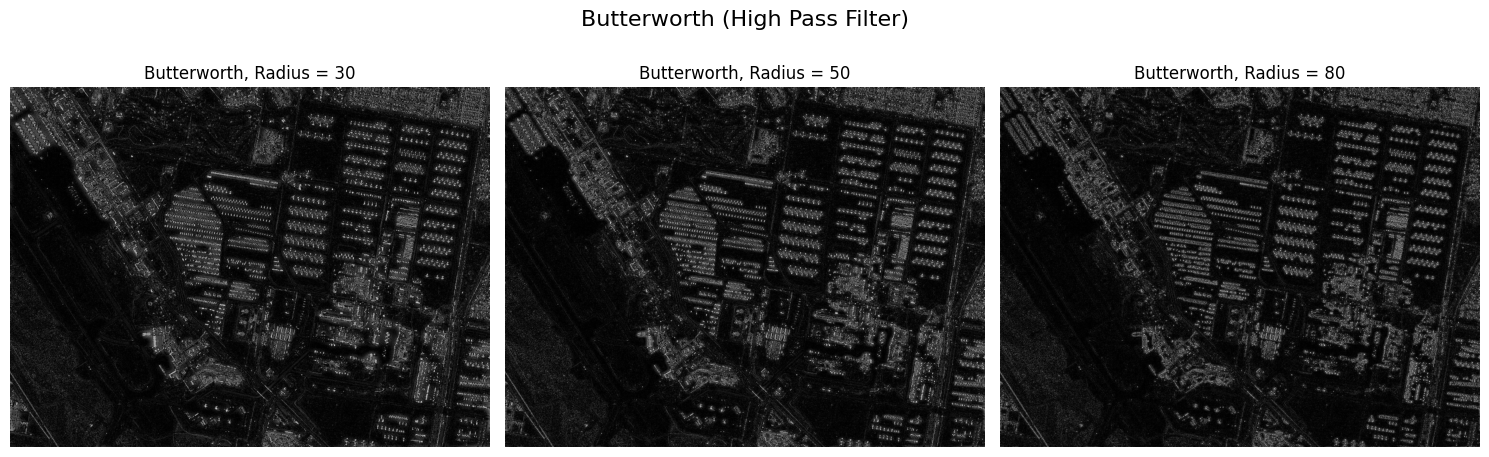

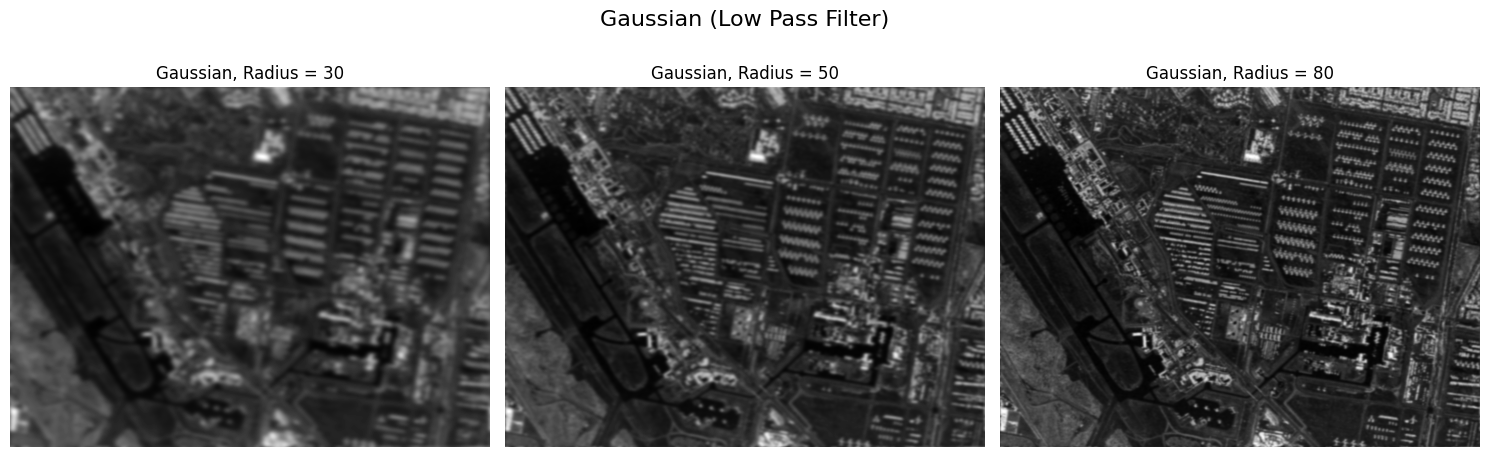

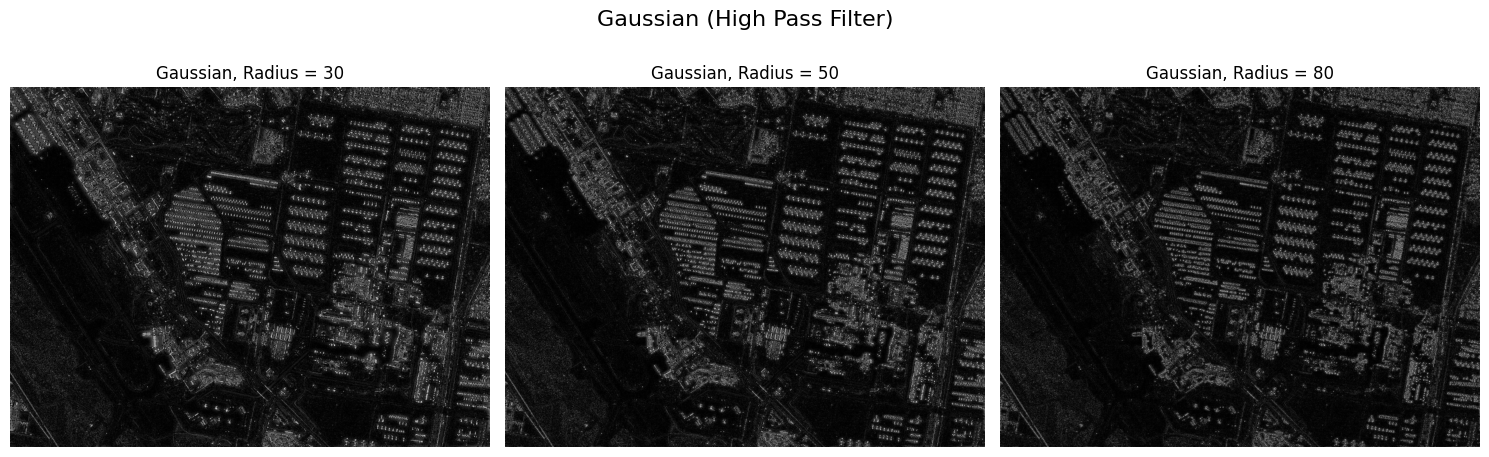

In [4]:
# Radii values to compare
radii = [30, 50, 80]
butterworth_order = 2  # Order of Butterworth filter

# Function to plot comparison of different radii for each filter
def plot_filter_comparison(filter_name, filter_func, filter_type='low', n=None):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    for i, radius in enumerate(radii):
        if n is not None:
            filter_mask = filter_func(image.shape, radius, n, filter_type=filter_type)
        else:
            filter_mask = filter_func(image.shape, radius, filter_type=filter_type)
        
        filtered_image = apply_filter(dft_shift, filter_mask)
        
        axs[i].imshow(filtered_image, cmap='gray')
        axs[i].set_title(f'{filter_name}, Radius = {radius}')
        axs[i].axis('off')
    
    plt.suptitle(f'{filter_name} ({filter_type.capitalize()} Pass Filter)', fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot comparison for Ideal Low Pass Filter
plot_filter_comparison('Ideal', ideal_filter, 'low')

# Plot comparison for Ideal High Pass Filter
plot_filter_comparison('Ideal', ideal_filter, 'high')

# Plot comparison for Butterworth Low Pass Filter (include Butterworth order 'n')
plot_filter_comparison('Butterworth', butterworth_filter, 'low', n=butterworth_order)

# Plot comparison for Butterworth High Pass Filter (include Butterworth order 'n')
plot_filter_comparison('Butterworth', butterworth_filter, 'high', n=butterworth_order)

# Plot comparison for Gaussian Low Pass Filter
plot_filter_comparison('Gaussian', gaussian_filter, 'low')

# Plot comparison for Gaussian High Pass Filter
plot_filter_comparison('Gaussian', gaussian_filter, 'high')

Interpretation:<br>
For each filter, the comparison shows how the cutoff radius controls the amount of information retained in the filtered image.<br>
Low Pass Filters: As the radius increases, the filter retains more low-frequency information, resulting in progressively blurrier images.<br>
High Pass Filters: As the radius increases, more high-frequency details (edges) are retained, while low-frequency components (background) are removed.

<b>Step 6: Visualizing Results:<b>

Ideal Low Pass Filter:<br>
Radii 30, 50, 80: Shows the impact of allowing low-frequency components to pass. Smaller radii result in sharper images, while larger radii create more blur by removing high-frequency details.<br>
<br>
Ideal High Pass Filter:<br>
Radii 30, 50, 80: Highlights how high frequencies (details and edges) are retained while smooth areas (low-frequency components) are progressively removed.<br>
<br>
Butterworth Low Pass Filter:<br>
Radii 30, 50, 80: Demonstrates smoother transitions in retaining low frequencies as the radius increases, compared to the sharp cutoffs of the Ideal filter.<br>
<br>
Butterworth High Pass Filter:<br>
Radii 30, 50, 80: Retains high-frequency components but with a smoother transition, maintaining some low-frequency elements, leading to more natural-looking images than the Ideal high-pass filter.<br>
<br>
Gaussian Low Pass Filter:<br>
Radii 30, 50, 80: Exhibits a very smooth blurring effect as radius increases, with a gradual reduction in detail as high frequencies are filtered out.<br>
<br>
Gaussian High Pass Filter:<br>
Radii 30, 50, 80: Emphasizes fine details while removing background information. Higher radii allow more detail preservation with smoother transitions.<br>


Conclusion:<br>
<br>
Filter Choice:<br>
Ideal filters provide sharp, clear distinctions between retained and removed frequencies, which can be useful for tasks that require precise filtering, but they may introduce artifacts such as ringing in the image.<br>
Butterworth and Gaussian filters are more natural and smoother in their transitions, making them suitable for applications requiring gradual filtering and reduced image artifacts.<br>
<br>
Effect of Radius:<br>
For all filters, increasing the radius allows more frequencies to pass through, significantly altering the image quality. Lower radii provide aggressive filtering, which can either emphasize (high pass) or smooth (low pass) the image.<br>
The trade-off between retaining detail and removing noise is governed by the choice of filter type and radius. Gaussian filters provide the most visually pleasing results, while Butterworth offers a balance between sharpness and smoothness.